# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [34]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [51]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [32]:
# Your code here
websites.sample(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
983,B0_909,52,10,UTF-8,nginx,NaN,CA,Manitoba,30/09/2002 0:00,24/09/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
399,B0_295,38,9,utf-8,ATS,618.0,US,CA,18/01/1995 0:00,26/08/2015 0:00,...,17,7,5306,54,42,39325,5906,54,8.0,0
1426,B0_2235,73,11,UTF-8,Apache/2.4.18 (Ubuntu),12487.0,US,Illinois,2/08/2000 0:00,26/04/2017 0:00,...,11,12,1524,22,19,1268,1524,22,0.0,0
1409,B0_244,72,9,ISO-8859-1,Apache/2.2.26 (Unix) mod_ssl/2.2.26 OpenSSL/0....,2819.0,BE,ANTWERP,13/10/2000 0:00,1/11/2012 0:00,...,2,13,3042,45,26,5914,3520,45,6.0,0
850,B0_694,48,10,UTF-8,Apache,58.0,US,CO,22/06/2014 0:00,22/06/2016 0:00,...,6,12,2634,28,26,4384,2932,28,4.0,0
254,B0_1342,34,7,ISO-8859-1,Apache/2.2.31 (CentOS),NaN,CA,ALBERTA,10/04/2010 0:00,10/04/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1389,B0_207,71,12,UTF-8,Apache,13522.0,US,CA,18/01/1996 5:00,20/01/2017 1:26,...,20,10,3317,36,35,8700,3747,36,6.0,0
1161,B0_1399,59,9,ISO-8859-1,None,NaN,US,CA,29/03/1997 0:00,29/11/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1070,B0_1179,56,12,ISO-8859-1,None,1819.0,US,CA,2/11/2002 0:00,2/02/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
740,B0_1201,46,9,iso-8859-1,Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips,231.0,None,None,22/09/2009 0:00,23/04/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [33]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

None

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

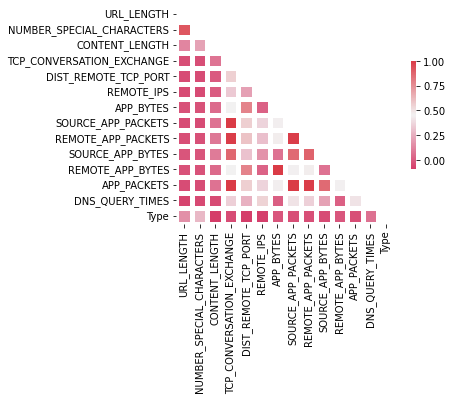

In [38]:
corr=websites.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);


In [40]:
corr=websites.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1') 
 .set_precision(2))

<ipython-input-40-889e8b14e6c7>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NUMBER_SPECIAL_CHARACTERS,0.92,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CONTENT_LENGTH,0.13,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TCP_CONVERSATION_EXCHANGE,-0.04,-0.04,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DIST_REMOTE_TCP_PORT,-0.04,-0.04,-0.00,0.56,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
REMOTE_IPS,-0.05,-0.05,0.00,0.33,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan
APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.02,nan,nan,nan,nan,nan,nan,nan,nan
SOURCE_APP_PACKETS,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,nan,nan,nan,nan,nan,nan,nan
REMOTE_APP_PACKETS,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,0.99,nan,nan,nan,nan,nan,nan
SOURCE_APP_BYTES,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,0.88,nan,nan,nan,nan,nan


**Probablemente todos los cuadrados de mattriz que estén en un rojo intenso supondrán que se deban quitar todas esas columnas, dado que estamos hablando de una correlación muy fuerte. Esto va a suponer que no vayamos verderamente a poder apreciar el efecto que tengan esas variables predictoras sobre la variable 'Type', dado que no son independientes.**

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [63]:
# Your code here
websites= websites.drop(['REMOTE_APP_PACKETS'], axis=1)

In [64]:
corr=websites.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1') 
 .set_precision(2))

<ipython-input-64-aa8f49960164>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
NUMBER_SPECIAL_CHARACTERS,nan,nan,nan,nan,nan,nan,nan,nan
CONTENT_LENGTH,0.21,nan,nan,nan,nan,nan,nan,nan
DIST_REMOTE_TCP_PORT,-0.04,-0.00,nan,nan,nan,nan,nan,nan
REMOTE_IPS,-0.05,0.00,0.21,nan,nan,nan,nan,nan
APP_BYTES,-0.02,0.05,0.78,0.02,nan,nan,nan,nan
SOURCE_APP_BYTES,-0.01,0.10,0.31,0.17,0.07,nan,nan,nan
DNS_QUERY_TIMES,-0.05,-0.05,0.26,0.55,0.01,0.22,nan,nan
Type,0.28,-0.09,-0.08,-0.08,-0.01,-0.04,0.07,nan


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [71]:
df= websites

In [106]:
def limpieza(x):
    if x== 'None':
        return np.nan
    else:
        return x

In [113]:
# Your code here
c=list(df.columns)
for i in c:
    df[str(i)]=df[str(i)].apply(limpieza)
    

In [118]:
#df= df.drop(['CONTENT_LENGTH'], axis=1)
df.isnull().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [168]:
def limpi(x):
    if x =="[u'GB'; u'UK']":
        return 'UK'
    if x== 'GB':
        return 'UK'
    if x== 'United Kingdom':
        return 'UK'
    if x== 'us':
        return 'US'
    if x== 'ru':
        return 'RU'
    if x== 'se':
        return 'SE'
    if x== 'Cyprus':
        return 'CY'
    else:
        return x

In [169]:
df['WHOIS_COUNTRY']= df['WHOIS_COUNTRY'].apply(limpi)

<ipython-input-169-f825230be066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WHOIS_COUNTRY']= df['WHOIS_COUNTRY'].apply(limpi)


In [170]:
df['WHOIS_COUNTRY'].unique()

array([nan, 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ', 'PH',
       'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA', 'CH',
       'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [205]:
def serv(x):
    try:
        if x[0]=='A' and x[1]=='p' and x[2]=='a':
            return 'Apache'
        if x[0]=='M' and x[1]=='i' and x[2]=='c':
            return 'Microsoft'
        if x[0]=='m' and x[1]=='w':
            return 'mw.codfw.wmnet'
        if x[0]=='n' and x[1]=='g' and x[2]=='i':
            return 'nginx'
        if x[0]=='N' and x[1]=='g' and x[2]=='i':
            return 'nginx'
        else: 
            return x
    except:
        TypeError
    

In [206]:
df['SERVER']= df['SERVER'].apply(serv)


In [192]:
df['WHOIS_COUNTRY']=df['WHOIS_COUNTRY'].fillna('None')

In [193]:
top_10 = ['US', 'CA', 'ES', 'UK', 'AU', 'PA', 'JP', 'CN', 'IN', 'FR']

for i in df['WHOIS_COUNTRY']:
    if i not in top_10:
        df['WHOIS_COUNTRY'] = df.WHOIS_COUNTRY.str.replace(i, "OTHER")

In [195]:
df.WHOIS_COUNTRY.value_counts()

US       966
OTHER    373
CA        76
ES        63
AU        34
UK        33
PA        21
JP        11
IN        10
CN        10
FR         8
Name: WHOIS_COUNTRY, dtype: int64

In [196]:
df.isnull().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        6
SERVER                         0
WHOIS_COUNTRY                  0
WHOIS_STATEPRO               338
WHOIS_REGDATE                122
WHOIS_UPDATED_DATE           134
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [197]:
# Your code here
df= df.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)

In [198]:
df.isnull().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      6
SERVER                       0
WHOIS_COUNTRY                0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [199]:
# Your code

array(['M0_109', 'B0_2314', 'B0_911', ..., 'B0_162', 'B0_1152', 'B0_676'],
      dtype=object)

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [200]:
# Your code here
df= df.drop(['URL'], axis=1)

La verdad es que con URL me parece bastante fácil agrupar en M0 y B0, pero si lo camobio a categóricas me doy cuenta de que tiene una colineaalidad perfecta con type, dado que las iniciales del URL indican si la web es benigna o maligna asi que es mejoor borrarla.

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [216]:
df = df[df['CHARSET'].notna()]
len(df.CHARSET)

1599

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

Ya lo he agrupado pero lo que voy a hacer es que los que no estén en mis agrupaciones, lo voy a llamar other.


![Think Hard](../think-hard.jpg)

In [207]:
df.SERVER.unique()

array(['nginx', 'Apache', 'Microsoft', 'openresty/1.11.2.1',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'openresty',
       'Heptu web server', 'Pepyaka/1.11.3', 'LiteSpeed', 'GSE',
       'Tengine', 'Sun-ONE-Web-Server/6.1', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Server', 'KHL', 'mw.codfw.wmnet',
       'Jetty(9.0.z-SNAPSHOT)', 'HTTPDaemon', 'MediaFire', 'DOSarrest',
       'Sucuri/Cloudproxy', 'DPS/1.1.8', 'ATS/5.3.0', 'SSWS',
       'YouTubeFrontEnd', 'Squeegit/1.2.5 (3_sir)',
       'Virtuoso/07.20.3217 (Linux) i686-generic-linux-glibc212-64  VDB',
       'Yippee-Ki-Yay', 'Proxy Pandeiro UOL', 'openresty/1.11.2.2',
       'Varnish', 'Resin/3.1.8', 'barista/5.1.3', 'ECD (fll/0790)',
       'Pagely Gateway/1.5.1', 'fbs', 'gunicorn/19.7.1', 'lighttpd',
       'AkamaiGHost', 'PWS/8.2.0.7', 'nxfps', 'Play',
       'Scratch Web Server', 'marrakesh 1.12.2', 'squid/3.3.8',
       'Zope/(2.13.16; python 2.6.8; linux2) ZServer/1.1', '.V01 Apache',
       'Aeria Games &

In [212]:
df['SERVER']= df['SERVER'].apply(serv)

In [219]:
top = ['nginx', 'Apache', 'Microsoft', 'mw.codfw.wmnet']

for i in df['SERVER']:
    if i not in top:
        df['SERVER'] = df.SERVER.str.replace(i, "Other")


<ipython-input-219-e1863bb67f3b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SERVER'] = df.SERVER.str.replace(i, "Other")


In [224]:
def severiano(x):
    if x=='Jetty(9.0.z-SNAPSHOT)':
        return 'Other'
    if x=='Squeegit/1.2.5 (3_sir)':
        return 'Other'
    if x== 'Virtuoso/07.20.3217 (Linux) i686-generic-linux-glibc212-64  VDB':
        return 'Other'
    if x== 'ECD (fll/0790)':
        return 'Other'
    if x== 'Zope/(2.13.16; python 2.6.8; linux2) ZOther/1.1':
        return 'Other'
    else:
        return x
    

In [227]:
df.SERVER= df.SERVER.apply(severiano)

In [228]:
df.SERVER.value_counts()

Apache            640
Other             360
nginx             342
Microsoft         196
mw.codfw.wmnet     61
Name: SERVER, dtype: int64

In [231]:
df = df[df['DNS_QUERY_TIMES'].notna()]

In [232]:
df.isnull().sum()

NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
# Your code here


In [233]:
# Count `SERVER` value counts here
df.SERVER.value_counts()

Apache            639
Other             360
nginx             342
Microsoft         196
mw.codfw.wmnet     61
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [240]:
# Your code here
website_dummy = pd.get_dummies(df, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [241]:
website_dummy.isnull().sum()

NUMBER_SPECIAL_CHARACTERS    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
CHARSET_ISO-8859-1           0
CHARSET_UTF-8                0
CHARSET_iso-8859-1           0
CHARSET_us-ascii             0
CHARSET_utf-8                0
CHARSET_windows-1251         0
CHARSET_windows-1252         0
SERVER_Microsoft             0
SERVER_Other                 0
SERVER_mw.codfw.wmnet        0
SERVER_nginx                 0
WHOIS_COUNTRY_CA             0
WHOIS_COUNTRY_CN             0
WHOIS_COUNTRY_ES             0
WHOIS_COUNTRY_FR             0
WHOIS_COUNTRY_IN             0
WHOIS_COUNTRY_JP             0
WHOIS_COUNTRY_OTHER          0
WHOIS_COUNTRY_PA             0
WHOIS_COUNTRY_UK             0
WHOIS_COUNTRY_US             0
dtype: int64

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [243]:
from sklearn.model_selection import train_test_split
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [294]:
# Your code here:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [295]:
logreg.fit(X,y)

LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [296]:
y_test_pred=logreg.predict(X_test)

In [297]:
accuracy_score(y_test, y_test_pred)

0.896875

In [298]:
confusion_matrix(y_test, y_test_pred)

array([[287,   0],
       [ 33,   0]])

In [299]:
y.value_counts()

0    1383
1     215
Name: Type, dtype: int64

What are your thoughts on the performance of the model? Write your conclusions below.

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [5]:
# Your code here:



To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [6]:
# Your code here:



#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [7]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [8]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here